In [409]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from numpy import math 
from math import exp
import matplotlib.pyplot as plt


In [410]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

    

In [444]:
def error(a,x1,x2,b,y,c):
    e=0
    m=len(y)
    for i in range(m):
        f= a*x1[i]+b*x2[i]+c
        e+=-y[i]*np.log(sigmoid(f))-(1-y[i])*np.log(1-sigmoid(f))
    return (1/m)*e

In [460]:
def step_gradient(a,x1,x2,b,y,learning_rate,c):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(x1)
    for i in range(m):
        f= a*x1[i]+b*x2[i]+c
        grad_a += (sigmoid(f)-y[i])*x1[i]
        grad_b += (sigmoid(f)-y[i])*x2[i]
        grad_c += (sigmoid(f)-y[i])
       
      
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
   
    
    return a,b,c

In [461]:
def descend(initial_a,initial_b,initial_c,x1,x2,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
    c=initial_c
   
    for i in range(iterations):
        e=error(a,x1,x2,b,y,c)
        a,b,c=step_gradient(a,x1,x2,b,y,learning_rate,c)
        if i % 1000 == 0:
            print(f"Error: {e},a:{a},b:{b},c:{c}")
    return a,b,c

In [462]:
from sklearn.datasets import load_breast_cancer

In [463]:
cancer=load_breast_cancer()


In [464]:
features=pd.DataFrame(cancer.data,columns=cancer.feature_names)
target=pd.DataFrame(cancer.target,columns=['TARGET'])

In [465]:
data2=data.corr('pearson')


In [466]:
data2.loc['TARGET'].sort_values(ascending=False)

TARGET                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [467]:
data=pd.concat([features,target],axis=1)
#data.head(10)

In [468]:
x1=np.array(data['worst concave points'])
x2=np.array(data['worst perimeter'])
y=np.array(data['TARGET'])
x1=(x1-x1.min())/(x1.max()-x1.min())
x2=(x2-x2.min())/(x2.max()-x2.min())
print(len(x1))

569


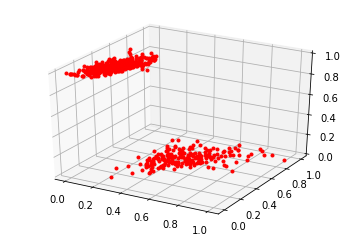

In [469]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.plot(x2,x1,y,'r.')
plt.show()

In [488]:
sep=int(0.9*len(data))

x1_train=x1[:sep]
y_train=y[:sep]
x2_train=x2[:sep]

x1_test=x1[sep:]
y_test=y[sep:]

x2_test=x2[sep:]

print(len(x1_train))
print(len(x2_train))
print(len(y_train))

512
512
512


In [471]:
a,b,c=0,0,0
learning_rate=0.0001
iterations=10000

final_a,final_b,final_c=descend(a,b,c,x1_train,x2_train,y_train,learning_rate,iterations)

Error: 0.6931471805599468,a:-0.002139281615120276,b:-0.0015565939538821657,c:0.0058000000000000005
Error: 0.413431657956414,a:-2.5125241004505963,b:-1.8557602844880596,c:1.928446441068585
Error: 0.3218258168335619,a:-4.010002333347529,b:-3.0245125942865485,c:2.933381493380416
Error: 0.2771922076723842,a:-5.034692352147198,b:-3.8779711167356297,c:3.6326771379710676
Error: 0.2507450200022264,a:-5.804299376457334,b:-4.562341307670921,c:4.168494360102039
Error: 0.23318578811200677,a:-6.414773485940644,b:-5.141043884892499,c:4.602832874912697
Error: 0.22063516435731403,a:-6.916505592599916,b:-5.647097177447896,c:4.967974069255163
Error: 0.21118913920573487,a:-7.33920813341534,b:-6.099871262971748,c:5.282835072225214
Error: 0.2038031126580736,a:-7.701878217746542,b:-6.5117144423617725,c:5.559456303426349
Error: 0.19785561223444087,a:-8.017407690340645,b:-6.890994264885512,c:5.8059812623445755


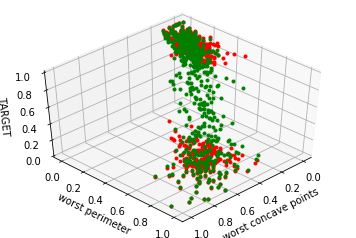

In [484]:
f=(final_a*x1_train)+(final_b*x2_train)+final_c
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.view_init(45,45)

ax.plot3D(x2_train,x1_train,y_train,'r.')
ax.plot3D(x2_train,x1_train, sigmoid(f),'g.')
ax.set_xlabel("worst concave points")
ax.set_ylabel("worst perimeter")
ax.set_zlabel("TARGET")
plt.show()

In [485]:
def accuracy(a,x1,x2,b,y,c):
    correct=0
    for i in range(len(x1)):
        f=a*x1[i]+b*x2[i]+c
        prediction=sigmoid(f)
        if prediction>0.5:
            z=1
        else:
            z=0
        if y[i]==z:
            correct+=1
    print("Accuracy: {}".format(correct/len(y)))

In [486]:
accuracy(final_a,x1_train,x2_train,final_b,y_train,final_c)

Accuracy: 0.9296875


In [489]:
accuracy(final_a,x1_test,x2_test,final_b,y_test,final_c)

Accuracy: 0.9649122807017544
